In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from scipy.ndimage.interpolation import shift
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("INFY__EQ__NSE__NSE__15__MINUTE.csv")
data = data["open"]
data.head()

0    505.73
1    502.63
2    502.58
3    503.68
4    503.50
Name: open, dtype: float64

<h6>Removing rows with Missing column values</h6>

In [3]:
data = data.dropna()

<h6>Visualizing the Data</h6>

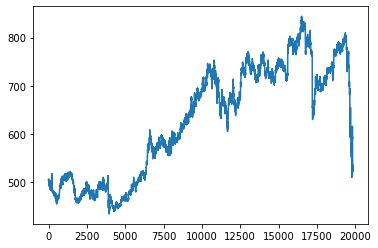

In [10]:
data.plot()

<h6>As we can see that the data doesnt have a constant mean over any interval, so we have to make the data Stationary</h6>

In [4]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def describeSeries(data, label):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data, label = "Series")
    plt.plot(data.rolling(2).mean(), '--', label = "Rolling mean")
    plt.plot(data.rolling(2).std(), ":", label = "Rolling Std")
    plt.legend()
    plt.savefig(label)
    plt.clf()
    
def splitTrainTest(series, testSplit):
    totalData = len(series)
    trainSplit = int(totalData * (1 - testSplit))
    trainSet = series[:trainSplit]
    testSet = series[trainSplit:]
    return trainSet, testSet

<h6>Splitting the data into train and test data</h6>

In [5]:
trainSet, testSet = splitTrainTest(data.values, 0.01)

<h6>Training the ARIMA Model</h6>

In [6]:
#The data wasnt stationary so we have to make it stationary.
differencedTrainSet = difference(trainSet, 200)
#Now the data is almost stationary.
model = ARIMA(differencedTrainSet, order=(0,1,0))
"""Fit model with non constant trend and no displacement"""
model_fit = model.fit(disp = 0)
forecast = model_fit.predict(len(differencedTrainSet), len(differencedTrainSet) + len(testSet))

<h6>Using the model for predicting test data</h6>

In [7]:

yPrediction = []
history = list(trainSet)
for f in forecast:
    yPredict = inverse_difference(history, f, 200)
    yPrediction.append(yPredict)
    history.append(yPredict)

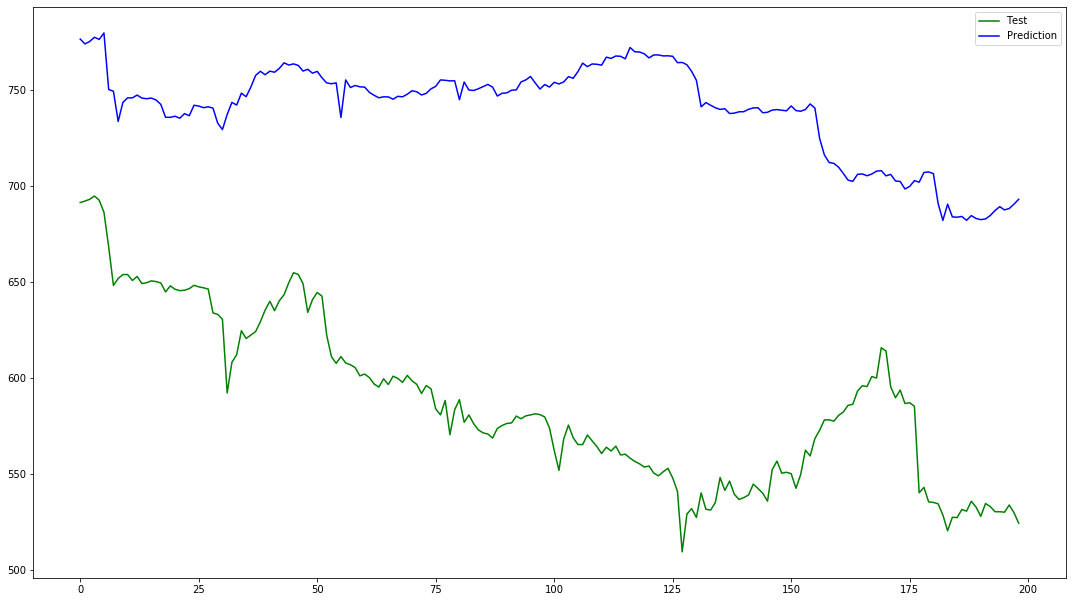

In [8]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(testSet, color='green', label = "Test")
plt.plot(yPrediction[:-1], color='blue', label = "Prediction")
plt.legend()
plt.savefig("StockPrediction.png")

In [11]:
describeSeries(data, "DescribeStocks.png")

<Figure size 1332x756 with 0 Axes>

<h6>Calculating the Root Mean Squared Error for test data</h6>

In [14]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(yPrediction[:-1],testSet.tolist()))
print(rmse)

158.2486673807725
